In [15]:
#import the libraries and upload the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [16]:
print(os.listdir())

['.ipynb_checkpoints', 'Final presentation.pptx', 'final project report.pptx', 'Heart Disease data.csv', 'Heart Disease Diagnostic Analysis.ipynb', 'heartdiseaseprediction-240417143745-ac7f76f1.pdf', 'Training presentation.pptx', 'WhatsApp Image 2024-05-27 at 18.44.02.jpeg', 'WhatsApp Image 2024-05-27 at 18.44.03.jpeg', '~$final project report.pptx']


In [17]:
df=pd.read_csv('Heart Disease data.csv')

In [18]:
# Display the top 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
#Display the bottom 5 rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [20]:
#Find the shape of our dataset
df.shape

(1025, 14)

In [21]:
# Get information about our dataset like total no. of rows, total no. of columns,
# datatype of each column and memory requirement
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [22]:
# check the null values in the datasset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
#check the duplicate data
df_dup=df.duplicated().any()
print(df_dup)

True


In [24]:
# Drop the duplicate data
df=df.drop_duplicates()

In [25]:
df.shape

(302, 14)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [13]:
#Get overall statistics about the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
#Draw the correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

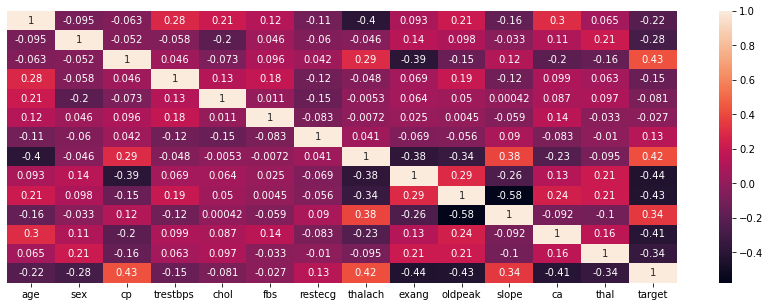

In [15]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), yticklabels=False,annot=True)

In [16]:
#How many people have suffering from heart disease
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

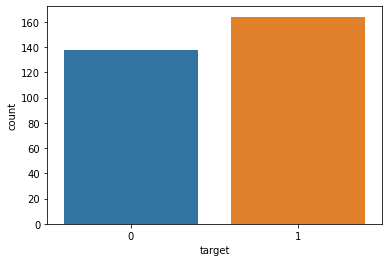

In [17]:
sns.countplot(df['target'])

In [18]:
#Find the male and female in the dataset
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

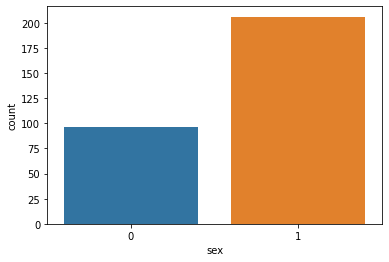

In [19]:
sns.countplot(df['sex'])
plt.xticks([0,1]),['Female','Male']
plt.show()

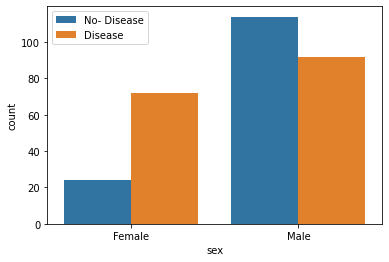

In [20]:
#Gender distribution according the target variable
sns.countplot(x = 'sex', hue="target", data=df)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No- Disease', 'Disease'])
plt.show()

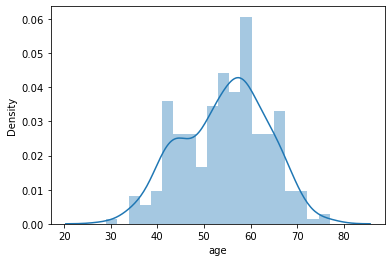

In [21]:
#Age Distribution in the data set
sns.distplot(df['age'],bins=20)
plt.show()

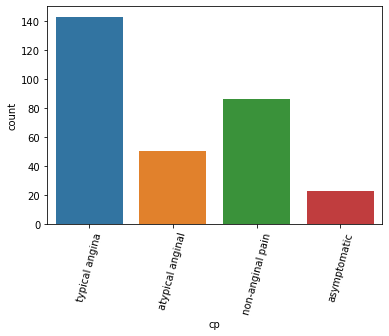

In [22]:
#check the chest pain 
sns.countplot(df['cp'])
plt.xticks([0,1,2,3],["typical angina","atypical anginal","non-anginal pain","asymptomatic"], rotation=75)
plt.show()

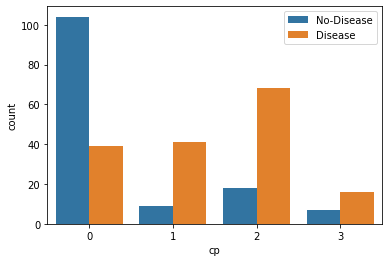

In [29]:
#the chest pain distribution as per target variable
sns.countplot(x='cp', hue='target', data=df)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

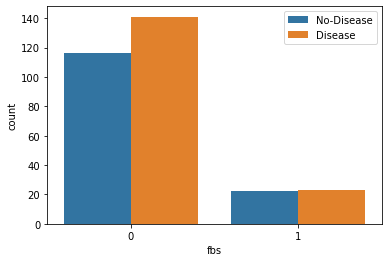

In [23]:
#show the fasting blood sugar distribution acording to the target variable
sns.countplot(x='fbs', hue='target', data=df)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

<AxesSubplot:>

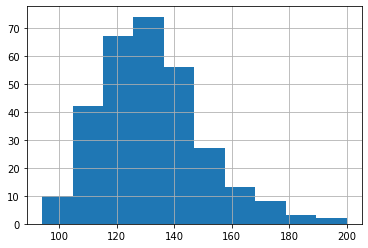

In [24]:
#Check the blood pressure distribution
df['trestbps'].hist()

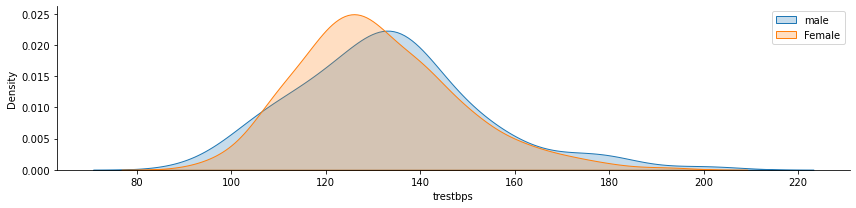

In [25]:
#compare the resting blood pressure as per sex column
g=sns.FacetGrid(df,hue='sex',aspect=4)
g.map(sns.kdeplot, 'trestbps', shade=True)
plt.legend(labels=['male', 'Female'])

<AxesSubplot:>

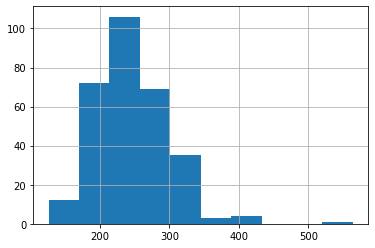

In [37]:
#show the distribution of serum cholestrol
df['chol'].hist()

In [26]:
#plot continuous variables
cate_val=[]
cont_val=[]
for column in df.columns:
    if df[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)
    

In [27]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [28]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

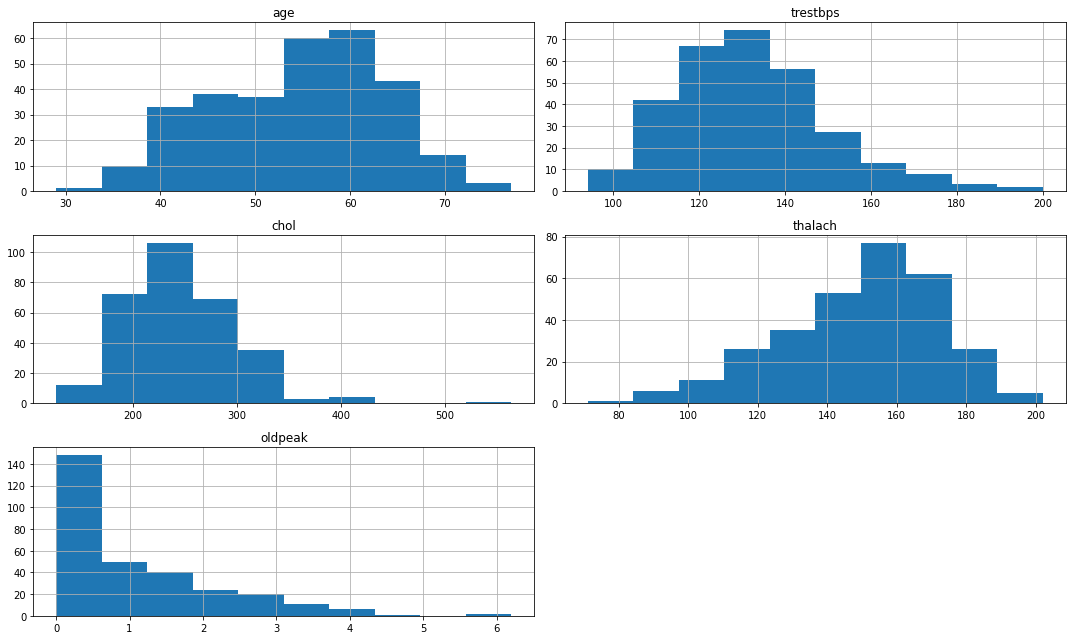

In [29]:
df.hist(cont_val, figsize=(15,9))
plt.tight_layout()
plt.show()